In [2]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

In [6]:
#Declaro una funcion, se escribe asi: (th es el vector de parametros)
#La funcion sale de wikipedia: (th[0] es X y th [1] es Y)

func = lambda th: np.sin(1/2 * th[0] ** 2 - 1/4 * th[1] **2 + 3) * np.cos(2*th[0] + 1 -np.e ** th[1])

func([5,3])

-0.5956138973318122

In [101]:
#Genero un vector que va de -2 a 2 y contiene 100 valores. Tanto para X como para Y

res = 200 #Res de resolucion. Cantidad de valores

_X = np.linspace(-5,5,res)

_Y = np.linspace(-5,5,res)

#Luego evaluo la funcion func para cada caso:
#Primero creo la matriz de 100x100 Z que contendra la salida de la funcion:
_Z = np.zeros((res, res)) 

#Y ahora ya si, evaluo la funcion ciclicamente:

for ix, x in enumerate(_X): #Escrito de esta manera, el ciclo for va recorriendo y en cada iteracion
    #guarda el indice en ix y el valor en x
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x,y])

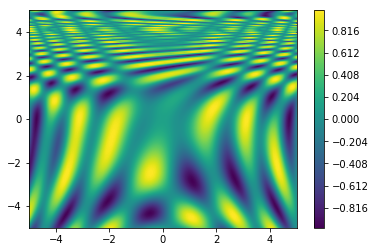

In [102]:
plt.contourf(_X,_Y,_Z, 500) #Se ve desde arriba. Cada color es una altura
plt.colorbar()
plt.show()

La idea del gradient descent es que si estas en una zona verde, logres bajar a una zona azul

In [103]:
Theta = np.random.rand(2) #Esto crea DOS variables aleatorias entre 0 y 1. Luego multiplicas por 4 y restas 2 para que
#quede entre -2 y 2
Theta = Theta * 4 - 2

Theta

array([-1.35862445,  0.31063527])

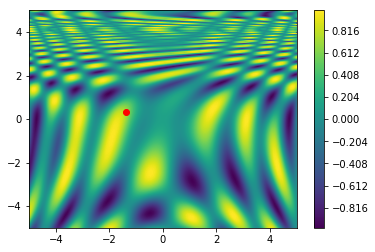

In [104]:
#Ahora volvemos a graficar todo en un mismo grafico:
plt.contourf(_X,_Y,_Z, 500) #Se ve desde arriba. Cada color es una altura
plt.colorbar()


plt.plot(Theta[0],Theta[1], "o", c="red")
plt.show()

Ese punto rojo hay que llevarlo a un punto azul. Esta funcion podria ser tranquilamente una funcion de coste que hay que llevarla a su minimo lo mas minimo posible y asi determinar cuales son los parametros deseados, es decir el X deseado y el Y deseado que hacen minimo el error. Aca hay 2 variables nada mas entonces se puede visualizar facilmente, pero podria no ser el caso.

In [105]:
_T = np.copy(Theta) #Los valores de Theta (los parametros actuales) los copio a la matriz _T para poder manipularlos 
#Es una cuestion de orden

h = 0.01 #Parametro para la derivada

lr= 0.1 #Esto es el learning rate

gradiente = np.zeros(Theta.size) #Inicializacion del gradiente, tiene el mismo tamanio que la matriz de parametros, obviamente

for it, th in enumerate(Theta):
    _T[it] =  _T[it] + h  #Operacion auxiliar
    
    deriv = (func(_T) - func(Theta))/h #Calculo de la derivada PARCIAL de la funcion respecto del parametro/s Theta
    
    gradiente[it] = deriv #Esa derivada forma parte del vector/matriz gradiente
    
#Finalmente se actualizan los parametros segun el learning rate:

ThetaPrueba = Theta - gradiente*lr

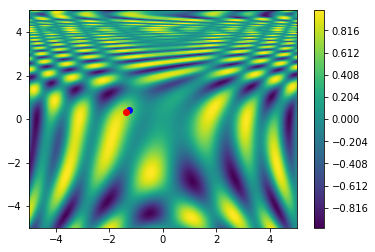

In [106]:
#Ahora volvemos a graficar todo en un mismo grafico:
plt.contourf(_X,_Y,_Z, 500) #Se ve desde arriba. Cada color es una altura
plt.colorbar()


plt.plot(ThetaPrueba[0],ThetaPrueba[1], "o", c="blue")
plt.plot(Theta[0],Theta[1], "o", c="red")
plt.show()

Si te fijas, ahora el punto se movio del rojo al azul. Y listo, la idea del gradient descent es ahora hacerle lo mismo al punto azul y seguir asi iterativamente hasta el fin de los tiempos, amen. Asi que escribire todo de nuevo pero dentro de un super ciclo for con 10000 iteraciones

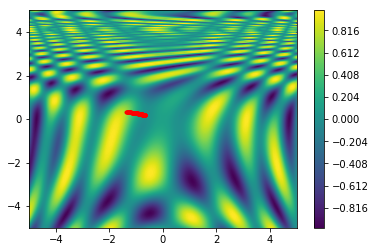

In [107]:
plt.contourf(_X,_Y,_Z, 500) #Se ve desde arriba. Cada color es una altura
plt.colorbar()

 #Los valores de Theta (los parametros actuales) los copio a la matriz _T para poder manipularlos 
#Es una cuestion de orden

h = 0.01 #Parametro para la derivada

lr= 0.0001 #Esto es el learning rate

gradiente = np.zeros(Theta.size) #Inicializacion del gradiente, tiene el mismo tamanio que la matriz de parametros, obviamente

for _ in range(10000):

    for it, th in enumerate(Theta):
        _T = np.copy(Theta)
        
        _T[it] =  _T[it] + h  #Operacion auxiliar
    
        deriv = (func(_T) - func(Theta))/h #Calculo de la derivada PARCIAL de la funcion respecto del parametro/s Theta
    
        gradiente[it] = deriv #Esa derivada forma parte del vector/matriz gradiente
    
    #Finalmente se actualizan los parametros segun el learning rate:

    Theta = Theta - gradiente*lr
    if (_ % 100 == 0):
        
        plt.plot(Theta[0],Theta[1], ".", c="red")

#Fin del for grande

plt.show()

Y asi es como va buscando cada vez más el minimo :D